In [3]:
## La remise à niveau R qui vous est proposée s'appuie sur un jeu de données 
## issues des travaux de recherche dont les réfrences vous sont fournies dans le dossier Docpdf
## en plus de support inrtroductif au langage R et à RStudio 

##################################################################
##
## I. définir le dossier de travail, import des librairies (packages)
##                  lecture et chargement des données
##
##################################################################

### Se positionner dans le répertoire des données ###
## vous changer le 'work directory' dans RStudio via le menu

setwd('../BData') ## A adapter en fonction de la localisation du dossier

## Pour vérifier que R 'regarde' dans le bon répertoire on peut utiliser la fonction dir() 

dir()

### chargement des paquets R pour lire et manipuler les données spatiales 
library(sf) ## lecture et écriture de données vecteurs 
## library(rgdal) ## lecture de données vecteurs

[1] "ptsampleFenayL93.cpg" "ptsampleFenayL93.dbf" "ptsampleFenayL93.prj"
[4] "ptsampleFenayL93.qpj" "ptsampleFenayL93.shp" "ptsampleFenayL93.shx"

In [4]:
##########################################################################
## Charge l'ensemble des pts echantillonnes sur la zone atelier de Fenay
## utilisation de la fonction st_read du package sf
## pour lister l'ensemble des fonctions du package sf: help(package = "sf")

## ?st_read ## pour afficher l'aide sur la function supprimer le commentaire ##

mydata <- st_read("ptsampleFenayL93.shp") ## Lecture et chargement des données


## mydata <- readOGR("ptsampleFenayL93.shp")
## affiche le header des données

Reading layer `ptsampleFenayL93' from data source 
  `/home/thierry/works/R4R2D2C_2022_2023/BData/ptsampleFenayL93.shp' 
  using driver `ESRI Shapefile'
Simple feature collection with 269 features and 16 fields
Geometry type: POINT
Dimension:     XY
Bounding box:  xmin: 853766.6 ymin: 6681507 xmax: 858712.6 ymax: 6684948
Projected CRS: RGF93 v1 / Lambert-93


In [5]:
## type de l'objet mydata
class(mydata)
## structure de l'objet mydata
str(mydata)

[1] "sf"         "data.frame"

Classes ‘sf’ and 'data.frame':	269 obs. of  17 variables:
 $ field_1   : chr  "Py_1_2011" "Py_100_2011" "Py_101_2011" "Py_102_2011" ...
 $ annee     : num  2011 2011 2011 2011 2011 ...
 $ SOC       : num  35 24.5 23 19.8 45.2 10.3 33.2 11 10.4 37.6 ...
 $ TN        : num  3.07 2.42 2.43 2.1 3.75 5.92 3.14 1.06 0.999 3.25 ...
 $ C_N       : num  11.4 10.1 9.48 9.44 12 1.74 10.6 10.4 10.4 11.6 ...
 $ PH        : num  6.78 8.1 7.5 7.51 8.06 8.25 8.2 6.78 7.75 8.13 ...
 $ Clay      : num  44.2 34.3 42 40.3 33 31 21.4 27.3 24.3 23.2 ...
 $ Sand      : num  4.5 15 8 11.6 10.1 5.6 14.4 7.9 6.5 11.8 ...
 $ XLB93     : num  857059 854843 858498 858283 855273 ...
 $ YLB93     : num  6684437 6682797 6682798 6682798 6682798 ...
 $ cat_cultur: chr  "Foret" "Hiver" "Ete" "Ete" ...
 $ Categories: chr  "pas_de_travail" "Travail_intermediaire" "Labour" "Labour" ...
 $ Shannon   : num  4.81 5.73 5.47 5.49 5.74 ...
 $ Evenness  : num  0.697 0.796 0.782 0.778 0.79 ...
 $ X1.Simpson: num  25.7 94.5 86.9 75

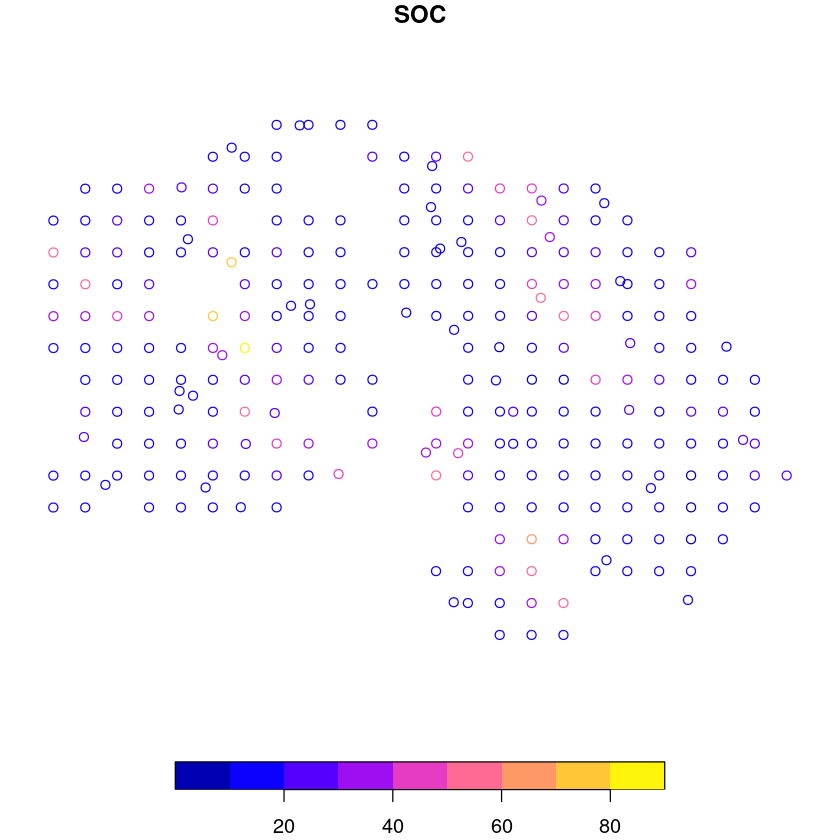

In [6]:
##################################################################
##
## II. Exploration des données :
##       - graphe les données pour la variable SOC (matière organique)
##       - trace l'histogramme pour la variable SOC
##       - Calcul des moments d'ordre 1 : min, max, moyenne, écart-type
##
##################################################################

## Graphe la variable SOC 
plot(mydata["SOC"])

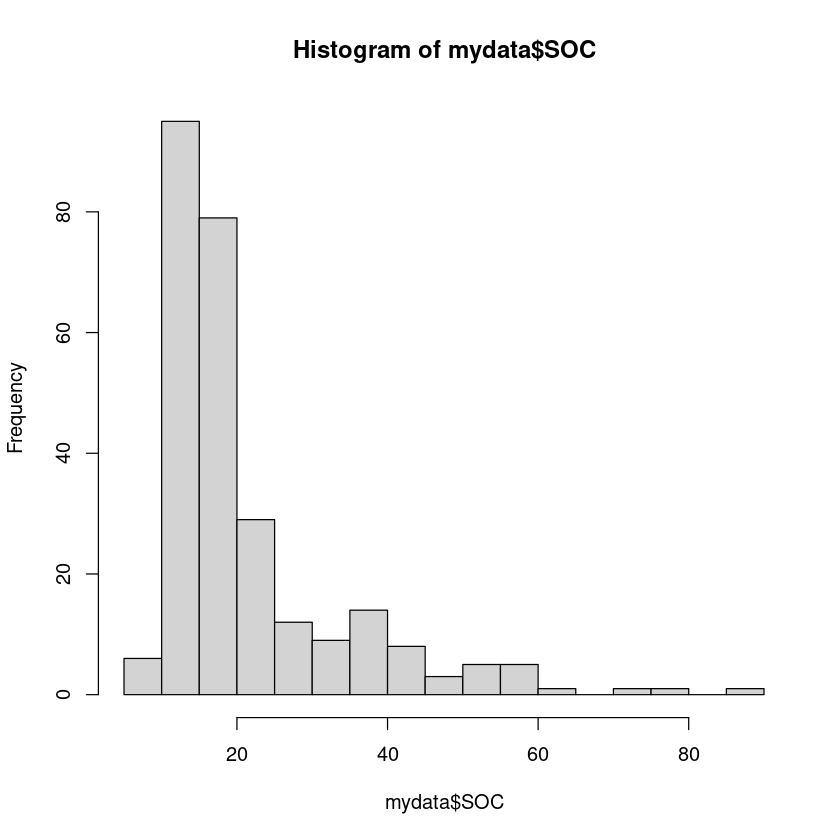

In [61]:
## gamme et distribution des valeurs pour la variable SOC
hist(mydata$SOC,breaks=15)

In [62]:
min(mydata$SOC);max(mydata$SOC)
range(mydata$SOC)
mean(mydata$SOC);sd(mydata$SOC)

[1] 9.5

[1] 88.6

[1]  9.5 88.6

[1] 21.38892

[1] 12.85612

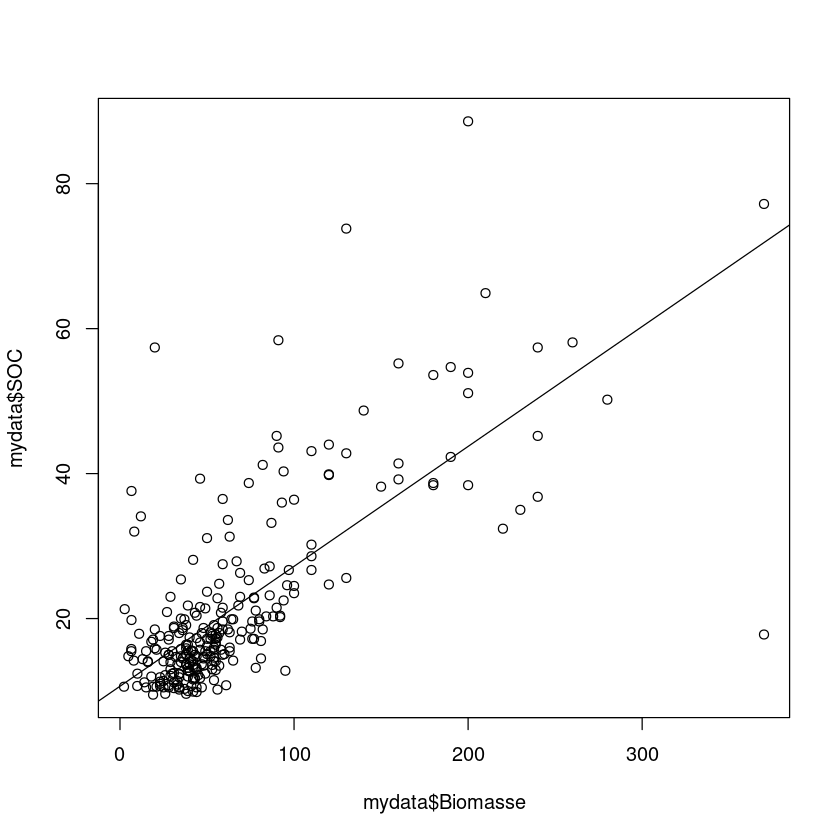

In [11]:
##################################################################
##
## III. Ajustement d'un modèle linéaire simple
##      métrique de la qualité de l'ajustement du modèle : r et R2
##      erreur quadratique moyenne associée à l'ajustement : RMSE
##
##################################################################

## scatterplot de SOC vs. Biomasse
plot(mydata$Biomasse,mydata$SOC)

## Ajustement d'un modèle linéaire
mylm <- lm(SOC~Biomasse, data = mydata)

## Trace la modèle linéaire ajusté
abline(mylm)


In [12]:
## résumé des paramètres et de la qualité de l'ajustement
summary(mylm)

## corrélation linéaire entre les deux variables
cor(mydata$Biomasse,mydata$SOC)

###############################################
###############################################
## Que déduire de ces résultats ?
## Commentaires ?


Call:
lm(formula = SOC ~ Biomasse, data = mydata)

Residuals:
    Min      1Q  Median      3Q     Max 
-54.076  -4.497  -2.043   2.393  44.848 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 10.664388   0.829971   12.85   <2e-16 ***
Biomasse     0.165438   0.009685   17.08   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 8.903 on 267 degrees of freedom
Multiple R-squared:  0.5222,	Adjusted R-squared:  0.5204 
F-statistic: 291.8 on 1 and 267 DF,  p-value: < 2.2e-16


[1] 0.7226226

In [13]:
## Calcule de la RMSE (Root Mean Squared Error) ou Erreur Quadratique Moyenne
RMSE <- sqrt(sum(mylm$residuals^2)/length(mylm$residuals))
RMSE

[1] 8.87017

In [15]:
##############################################################
##
## IV. Evaluation de la robustesse du modèle linéaire ajusté
##
## 1- estimateur cross validation : 1 échantillon d'entraînement (training sample) ~70%
##                                  1 échantillon de contrôle (control sample) ~30%
##
## 2- estimateur jackknife également appelée leave-one-out
###############################################################
dim(mydata) ## dimension de la table des données
ctrlsize <- floor(dim(mydata)[1]*0.3)
trainingsize <- dim(mydata)[1] - ctrlsize
ctrlsize ## nombre des données dans l'échantillon de contrôle
trainingsize ## nombre des données dans l'échanllion d'ajustement du modèle

## tirage aléatoire des données pour le contrôle
ctrl_sample <- sample(1:dim(mydata)[1], size=ctrlsize)

## copie de mydata et transformation en un objet dataframe
mydf <- mydata
st_geometry(mydf) <- NULL ## supression de la partie spatiale
class(mydf) ## mydf est maintenant un  objet dataframe cela va simplifier le sous-échantillonnage

[1] 269  17

[1] 80

[1] 189

[1] "data.frame"

In [16]:
#########################################################################################
##
## Calcul modèle d'entrainement
##
#########################################################################################
## Sélection des données pour paramétrer le modèle d'entrainement
training_mydf <- mydf[-ctrl_sample,]
## Sélection des données pour évaluer/controler le modèle
control_mydf <- mydf[ctrl_sample,]
## dimension de l'échantillon
dim(training_mydf)
dim(control_mydf)
## corrélation linéraire entre SOC vs Biomasse
cor(training_mydf$Biomasse,training_mydf$SOC)
## Ajustement du modèle linéraire à partie de l'échantillon d'entraînement
mydflm <- lm(SOC~Biomasse, data = training_mydf)

[1] 189  16

[1] 80 16

[1] 0.7214108

In [17]:
summary(mydflm)


Call:
lm(formula = SOC ~ Biomasse, data = training_mydf)

Residuals:
    Min      1Q  Median      3Q     Max 
-52.492  -4.577  -2.118   2.416  45.536 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 11.03183    1.03448   10.66   <2e-16 ***
Biomasse     0.16016    0.01124   14.25   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 9.459 on 187 degrees of freedom
Multiple R-squared:  0.5204,	Adjusted R-squared:  0.5179 
F-statistic: 202.9 on 1 and 187 DF,  p-value: < 2.2e-16


In [18]:
coef(mydflm)

(Intercept)    Biomasse 
  11.031829    0.160162

In [19]:
## Application du modèle ajusté sur les données de controle
## SOCpredict = a x Biomasse + b 
control_mydf$SOCpredict <- coef(mydflm)[2]*control_mydf$Biomasse + coef(mydflm)[1]

In [20]:
head(control_mydf)
tail(control_mydf)

,field_1,annee,SOC,TN,C_N,PH,Clay,Sand,XLB93,YLB93,cat_cultur,Categories,Shannon,Evenness,X1.Simpson,Biomasse,SOCpredict
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
49,Py_146_2011,2011,21.6,1.86,11.60,8.23,32.7,21.1,855488.5,6683228,Hiver,Labour,5.732,0.793639,98.807,46,18.39928
119,Py_212_2011,2011,14.2,1.40,10.20,7.27,35.6,6.6,856779.5,6683874,Printemps,Labour,5.500,0.782904,76.931,41,17.59847
159,Py_251_2011,2011,20.8,2.20,9.47,7.66,43.7,7.2,856779.0,6684304,Brassicacees,Labour,5.530,0.779772,82.715,58,20.32123
225,Py_57_2011,2011,14.7,1.21,12.10,6.85,25.1,9.9,853766.6,6682367,Hiver,Travail_intermediaire,5.487,0.781235,83.346,48,18.71961
199,Py_31_2011,2011,17.6,1.78,9.90,8.20,33.1,5.0,857207.2,6681507,Hiver,Labour,5.664,0.787283,86.395,23,14.71556
154,Py_247_2011,2011,26.3,2.37,11.10,7.99,43.1,4.9,857208.9,6684303,Brassicacees,Labour,5.424,0.756649,62.344,69,22.08301


,field_1,annee,SOC,TN,C_N,PH,Clay,Sand,XLB93,YLB93,cat_cultur,Categories,Shannon,Evenness,X1.Simpson,Biomasse,SOCpredict
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
33,Py_131_2011,2011,44.0,3.610,12.20,7.15,54.2,4.8,856348.9,6683013,Foret,pas_de_travail,5.023,0.732640,40.308,120.0,30.25127
108,Py_202_2011,2011,17.2,1.580,10.90,8.17,40.6,3.9,857853.8,6683873,Hiver,Travail_intermediaire,5.429,0.764411,57.978,77.0,23.36431
204,Py_38_2011,2011,10.2,1.070,9.54,8.17,25.1,7.2,856562.5,6681722,Hiver,Travail_intermediaire,5.727,0.797604,98.513,56.0,20.00090
104,Py_2_2011,2011,10.7,0.949,11.20,8.37,41.3,17.1,857497.0,6682011,Brassicacees,Labour,5.606,0.789509,91.701,9.9,12.61743
264,Py_94_2011,2011,22.9,2.160,10.60,8.14,36.6,16.0,856563.5,6682583,Hiver,Travail_intermediaire,5.706,0.786576,94.563,77.0,23.36431
234,Py_66_2011,2011,9.5,0.942,10.10,6.90,22.4,7.2,858067.8,6682368,Hiver,Labour,5.595,0.784790,81.464,19.0,14.07491


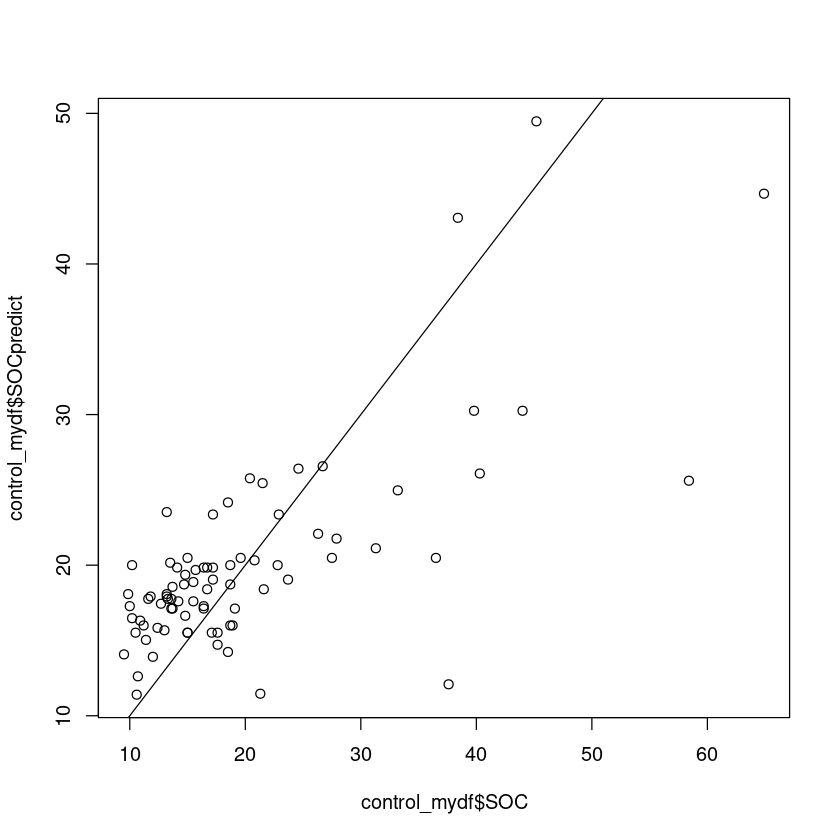

In [21]:
## Trace SOC mesuré vs SOC prédit par le modèle linéaire
plot(control_mydf$SOC, control_mydf$SOCpredict) ## scatterplot
abline(0,1) ## trace la droite 1:1

In [22]:
## Evaluataion de la qualité du modèle
cor(control_mydf$SOC,control_mydf$SOCpredict) ## coef corrélation linéaire
(cor(control_mydf$SOC,control_mydf$SOCpredict))^2 ## coef détermination
RMSE <- sqrt(sum((control_mydf$SOC-control_mydf$SOCpredict)^2)/dim(control_mydf)[1])
RMSE

[1] 0.72728

[1] 0.5289362

[1] 7.465264

In [23]:
## Estimateur Jackknife
## charge la function myjack qui est dans le fichier funjack.R
source("/home/thierry/works/R4R2D2C_2022_2023/RCode/funjack.R")
## Visualisation de la function myjack
myjack

function (tmp) 
{
    cvdf <- tmp[, c("SOC", "Biomasse")]
    colnames(cvdf) <- c("SOC", "SOCpredict")
    cvdf$SOCpredict <- NA
    for (i in 1:nrow(tmp)) {
        t.cv <- tmp[-i, ]
        coeff.lm <- coefficients(lm(SOC ~ Biomasse, data = t.cv))
        cvdf[i, 2] <- coeff.lm[2] * tmp$Biomasse[i] + coeff.lm[1]
    }
    r2 <- cor(cvdf[, 1], cvdf[, 2], use = "complete.obs")^2
    rmse <- sqrt(mean((cvdf[, 1] - cvdf[, 2])^2, na.rm = T))
    bias <- mean(abs(cvdf[, 1] - cvdf[, 2]))
    resultats <- list(cvdata = cvdf, r2 = r2, RMSE = rmse, biais = bias)
    return(resultats)
}

In [24]:
## Evaluation du modèle linéaire avec la méthode jackknife
resujack <- myjack(mydf)

In [25]:
str(resujack)

List of 4
 $ cvdata:'data.frame':	269 obs. of  2 variables:
  ..$ SOC       : num [1:269] 35 24.5 23 19.8 45.2 10.3 33.2 11 10.4 37.6 ...
  ..$ SOCpredict: num [1:269] 49.2 27.2 22.1 11.7 25.5 ...
 $ r2    : num 0.496
 $ RMSE  : num 9.12
 $ biais : num 5.78


In [ ]:
##############################################################
##
## IV. Modèle multi-linéaire 
## - Sélection de variables (régresseurs) via des critères d'information d'Akaike (AIC), critère d'information bayésien (BIC)
## - Contribution des variables
###############################################################
## chargement de la librairie pour la sélection
library(leaps)
## chargement de la librairie pour estimer l'importance relative des variables sélectionnées
library(relaimpo)


Le chargement a nécessité le package : MASS

Le chargement a nécessité le package : boot

Le chargement a nécessité le package : survey

Le chargement a nécessité le package : grid

Le chargement a nécessité le package : Matrix

Le chargement a nécessité le package : survival


Attachement du package : ‘survival’


L'objet suivant est masqué depuis ‘package:boot’:

    aml



Attachement du package : ‘survey’


L'objet suivant est masqué depuis ‘package:graphics’:

    dotchart


Le chargement a nécessité le package : mitools

This is the global version of package relaimpo.


If you are a non-US user, a version with the interesting additional metric pmvd is available


from Ulrike Groempings web site at prof.beuth-hochschule.de/groemping.




In [27]:
head(training_mydf) ## utilise l'ensemble des variables numériques
## la fonction 
choix_variables <- regsubsets(SOC ~ TN + C_N + PH + Clay + Shannon + Evenness + X1.Simpson + Biomasse, 
                              data = training_mydf)

,field_1,annee,SOC,TN,C_N,PH,Clay,Sand,XLB93,YLB93,cat_cultur,Categories,Shannon,Evenness,X1.Simpson,Biomasse
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>
1,Py_1_2011,2011,35.0,3.07,11.40,6.78,44.2,4.5,857058.6,6684437,Foret,pas_de_travail,4.810,0.697131,25.743,230.0
2,Py_100_2011,2011,24.5,2.42,10.10,8.10,34.3,15.0,854842.7,6682797,Hiver,Travail_intermediaire,5.729,0.795924,94.530,100.0
3,Py_101_2011,2011,23.0,2.43,9.48,7.50,42.0,8.0,858497.9,6682798,Ete,Labour,5.469,0.782461,86.932,69.0
4,Py_102_2011,2011,19.8,2.10,9.44,7.51,40.3,11.6,858283.0,6682798,Ete,Labour,5.492,0.777978,75.408,6.6
5,Py_103_2011,2011,45.2,3.75,12.00,8.06,33.0,10.1,855273.1,6682798,Hiver,Travail_intermediaire,5.742,0.790177,77.682,90.0
6,Py_104_2011,2011,10.3,5.92,1.74,8.25,31.0,5.6,858068.2,6682798,Hiver,Travail_intermediaire,5.519,0.771110,73.336,37.0


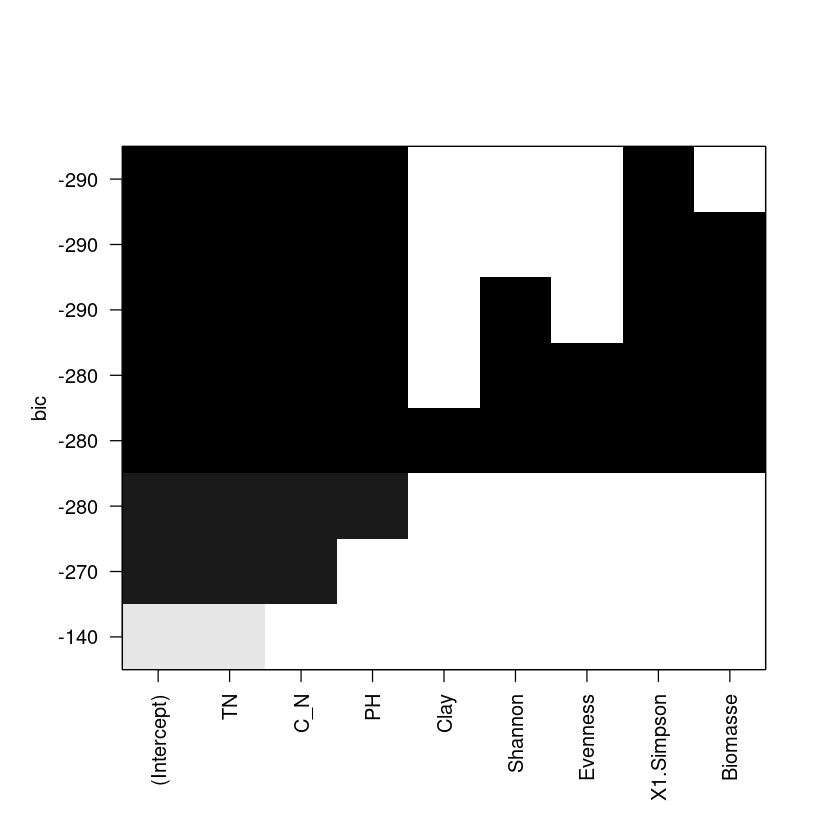

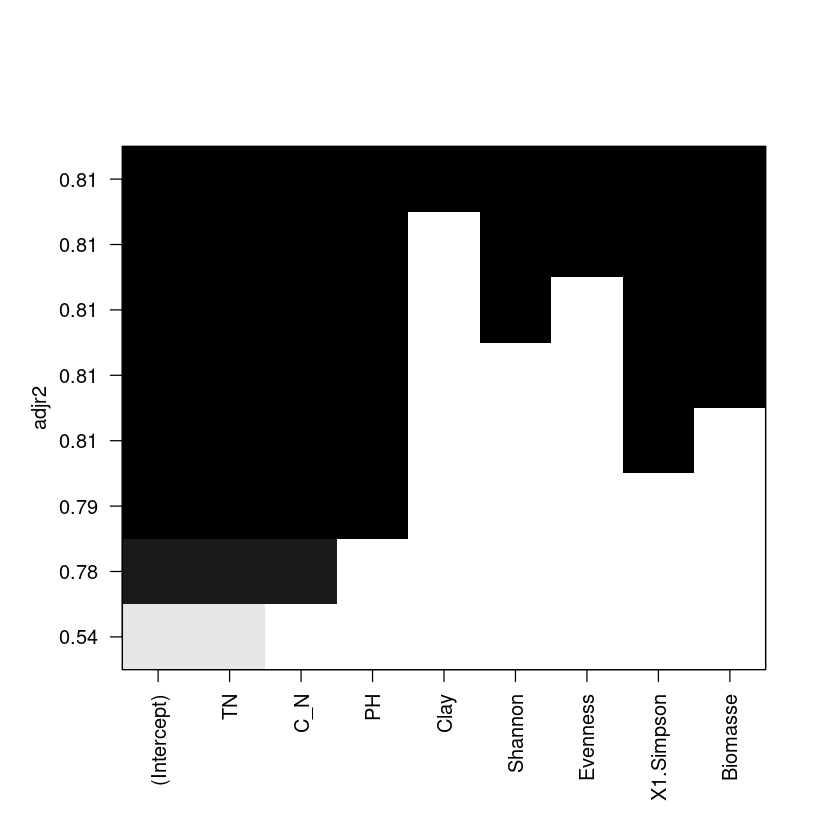

In [28]:
## trace le critère d'information ici le BIC (équivalent du AIC)
## pour ce critère on va retenir la combinaison des variables qui minimise la valeur du BIC
## pour un autre critère come le R2 ajusté on va retenir la combinaison qui maximise la valeur
plot(choix_variables, scale=c("bic"))
plot(choix_variables, scale=c("adjr2"))

#####################################################################################################################
## Question : vue les résultats avec ces deux critères quelles sont les variables et donc le modèle sélectionnée ?
#####################################################################################################################

In [29]:
## prenons par exemple le modèle SOC = fn(TN, C_N, PH, Biomasse)
mydfmlm <- lm(SOC~TN+C_N+PH+Biomasse, data = training_mydf)
summary(mydfmlm)


Call:
lm(formula = SOC ~ TN + C_N + PH + Biomasse, data = training_mydf)

Residuals:
    Min      1Q  Median      3Q     Max 
-54.836  -1.620   0.108   1.615  21.776 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) -59.53488    6.61539  -8.999 2.80e-16 ***
TN            6.29045    0.51379  12.243  < 2e-16 ***
C_N           4.24920    0.31259  13.594  < 2e-16 ***
PH            2.65360    0.64653   4.104 6.09e-05 ***
Biomasse      0.03805    0.01234   3.083  0.00237 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 6.132 on 184 degrees of freedom
Multiple R-squared:  0.8017,	Adjusted R-squared:  0.7973 
F-statistic: 185.9 on 4 and 184 DF,  p-value: < 2.2e-16


In [30]:
## Qu'en déduisez vous quand au score du modèle multilinéaire comparativement au modèle linéaire simple ?
## Evaluer la performance du modèle en vous appuyant sur l'échantillon de contrôle
control_varselect <- control_mydf[,c("TN", "C_N", "PH", "Biomasse")]
head(control_varselect)
control_mydf$SOCpredmlm <- predict.lm(mydfmlm, control_varselect)

,TN,C_N,PH,Biomasse
,<dbl>,<dbl>,<dbl>,<dbl>
49,1.86,11.60,8.23,46
119,1.40,10.20,7.27,41
159,2.20,9.47,7.66,58
225,1.21,12.10,6.85,48
199,1.78,9.90,8.20,23
154,2.37,11.10,7.99,69


In [31]:
head(control_mydf)

,field_1,annee,SOC,TN,C_N,PH,Clay,Sand,XLB93,YLB93,cat_cultur,Categories,Shannon,Evenness,X1.Simpson,Biomasse,SOCpredict,SOCpredmlm
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
49,Py_146_2011,2011,21.6,1.86,11.60,8.23,32.7,21.1,855488.5,6683228,Hiver,Labour,5.732,0.793639,98.807,46,18.39928,25.04529
119,Py_212_2011,2011,14.2,1.40,10.20,7.27,35.6,6.6,856779.5,6683874,Printemps,Labour,5.500,0.782904,76.931,41,17.59847,13.46512
159,Py_251_2011,2011,20.8,2.20,9.47,7.66,43.7,7.2,856779.0,6684304,Brassicacees,Labour,5.530,0.779772,82.715,58,20.32123,17.07724
225,Py_57_2011,2011,14.7,1.21,12.10,6.85,25.1,9.9,853766.6,6682367,Hiver,Travail_intermediaire,5.487,0.781235,83.346,48,18.71961,19.49521
199,Py_31_2011,2011,17.6,1.78,9.90,8.20,33.1,5.0,857207.2,6681507,Hiver,Labour,5.664,0.787283,86.395,23,14.71556,16.36377
154,Py_247_2011,2011,26.3,2.37,11.10,7.99,43.1,4.9,857208.9,6684303,Brassicacees,Labour,5.424,0.756649,62.344,69,22.08301,26.36699


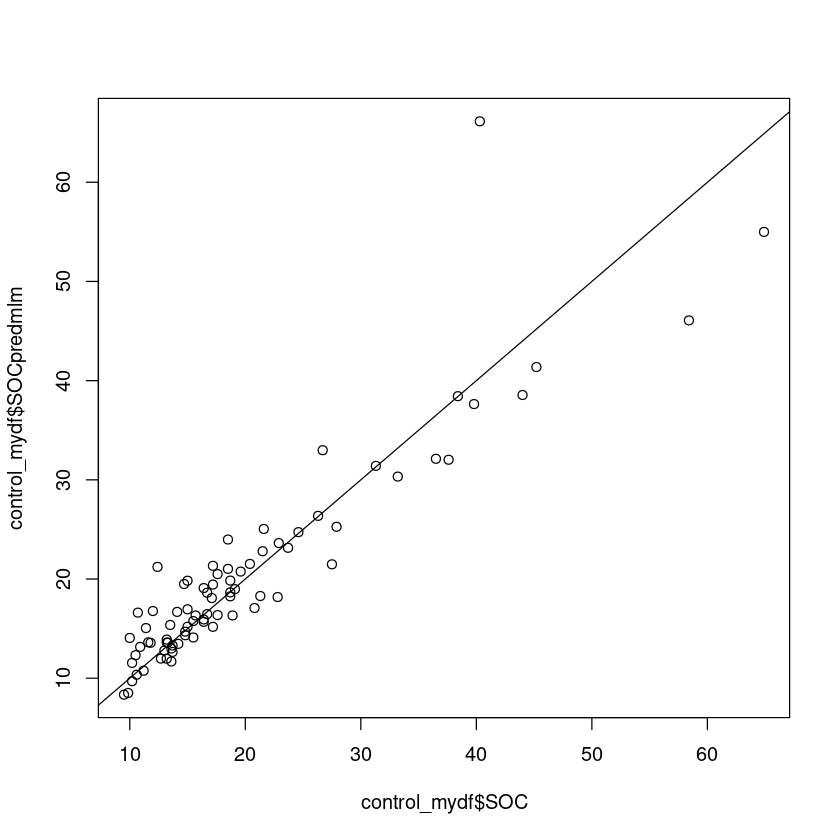

In [32]:
## Trace SOC mesuré vs SOC prédit par le modèle multi-linéaire
plot(control_mydf$SOC, control_mydf$SOCpredmlm) ## scatterplot
abline(0,1) ## trace la droite 1:1

In [33]:
## Evaluataion de la qualité du modèle multi-linéaire
cor(control_mydf$SOC,control_mydf$SOCpredmlm) ## coef corrélation linéaire
(cor(control_mydf$SOC,control_mydf$SOCpredmlm))^2 ## coef détermination
RMSE <- sqrt(sum((control_mydf$SOC-control_mydf$SOCpredmlm)^2)/dim(control_mydf)[1])
RMSE

[1] 0.9142307

[1] 0.8358178

[1] 4.359992

In [34]:
###############################################
##
## Contribution des variables
## utilisation de la fonction calc.relimp du package relaimpo
###############################################
reg.mlm <- lm(SOC ~ TN + C_N + PH + Biomasse, data = mydf)
regrelimpo <- calc.relimp(reg.mlm, type = c("lmg","pratt", "genizi","car"),
                          rela = TRUE, rank = TRUE)
summary(reg.mlm)


Call:
lm(formula = SOC ~ TN + C_N + PH + Biomasse, data = mydf)

Residuals:
    Min      1Q  Median      3Q     Max 
-62.831  -1.535   0.037   1.355  20.171 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) -53.43642    5.28792 -10.105  < 2e-16 ***
TN            6.58933    0.41802  15.763  < 2e-16 ***
C_N           3.75157    0.23589  15.904  < 2e-16 ***
PH            2.46561    0.52440   4.702 4.16e-06 ***
Biomasse      0.03705    0.01001   3.700 0.000262 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 5.581 on 264 degrees of freedom
Multiple R-squared:  0.8144,	Adjusted R-squared:  0.8116 
F-statistic: 289.6 on 4 and 264 DF,  p-value: < 2.2e-16


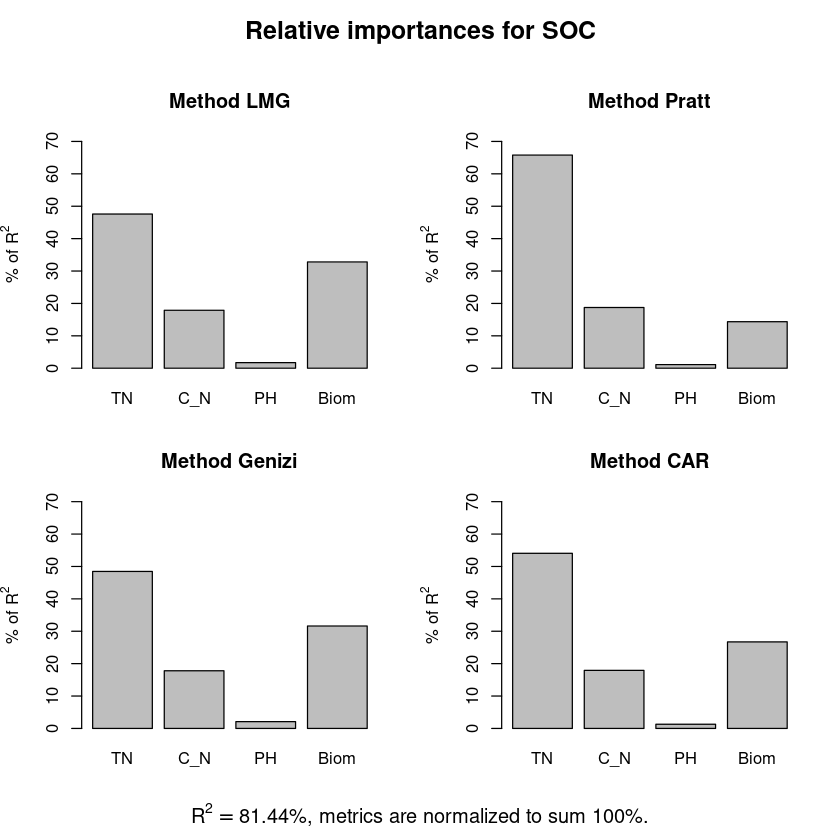

In [35]:
plot(regrelimpo)

In [36]:
#############################################
## Que dire de ces résultats ?
############################################

## Calcul du SOC prédit par le modèle
mydata$SOCpredmlm <- predict.lm(reg.mlm, mydf[,c("TN", "C_N", "PH", "Biomasse")])


In [37]:
class(mydata)
getwd()

[1] "sf"         "data.frame"

[1] "/home/thierry/works/R4R2D2C_2022_2023/BData"

In [88]:
## exporte mydata qui est un objet sf dans R en un fichier SIG shapefile lisible par QGIS
st_write(mydata, "newptsampleFenayL93.shp", delete_layer = TRUE)

Deleting layer `newptsampleFenayL93' using driver `ESRI Shapefile'
Writing layer `newptsampleFenayL93' to data source 
  `newptsampleFenayL93.shp' using driver `ESRI Shapefile'
Writing 269 features with 17 fields and geometry type Point.


In [89]:
## Allez ouvrir cette nouvelle couche/carte avec QGIS
## Faire la carte des différences entre SOC mesuré et SOC prédit par le modèle multi-linéaire